<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/16_3_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Functional API를 통해서 더 복잡한 구조의 모델을 만들 수 있다. 

https://www.tensorflow.org/guide/keras/functional


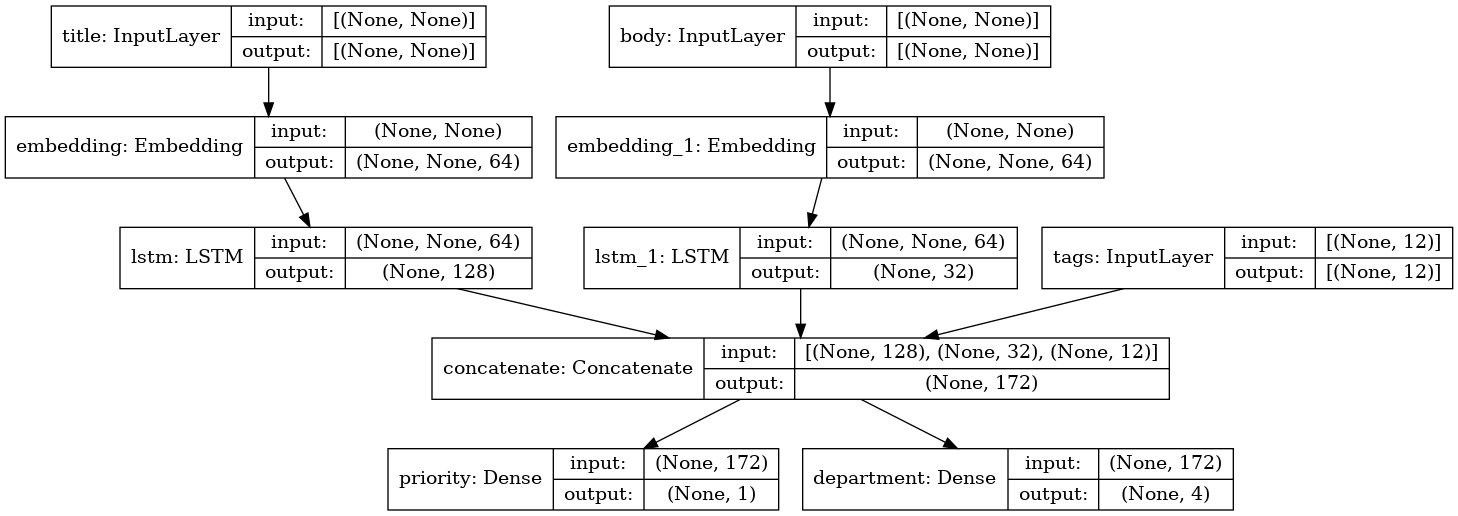

In [1]:
import tensorflow as tf

# 데이터 불러오기
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 Scaling
x_train, x_test = x_train / 255.0, x_test / 255.0

In [2]:
# 간단한 모델 만들기

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [3]:
# 모델 컴파일하기
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
# 모델 학습
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 2s 994us/step - loss: 0.2946 - accuracy: 0.9134
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1433 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1093 - accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss

Functional API로 모델을 바꿔봅시다

In [5]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

In [6]:
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten
from tensorflow.keras import Model

In [7]:
in_ = Input(shape=(28,28))
x = Flatten()(in_)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.2)(x)
out_ = Dense(10, activation = 'softmax')(x)
model2 = Model(inputs = in_, outputs=out_)

In [8]:
# 모델 컴파일하기
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=5)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3014 - accuracy: 0.9117
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1443 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 2s 980us/step - loss: 0.1100 - accuracy: 0.9670
Epoch 4/5
1875/1875 [==============================] - 2s 976us/step - lo

In [9]:
tf.keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [10]:
tf.keras.utils.plot_model(model2)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


Boston_housing Data를 사용해서 입력이 2개인 모델을 만들어봅시다

https://www.kaggle.com/c/boston-housing

In [11]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

In [12]:
print(x_train.dtype, y_train.dtype)
print(x_train.shape, y_train.shape)
print(y_test.shape)

float64 float64
(404, 13) (404,)
(102,)


In [13]:
# Importing the Boston Housing dataset
from sklearn.datasets import load_boston

boston = load_boston()

In [14]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [15]:
import pandas as pd

df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [16]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [17]:
x_train1, x_train2 = x_train[:, :10], x_train[:,10:]
x_test1, x_test2 = x_test[:, :10], x_test[:,10:]

In [18]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model

In [19]:
input_A = Input(shape=[10])
input_B = Input(shape=[3])

In [20]:
h1 = Dense(16, activation='relu')(input_A)
h2 = Dense(16, activation='relu')(h1)
concat = concatenate([input_B, h2])
out1 = Dense(1)(h2)
out2 = Dense(1)(concat)
model = Model(inputs = [input_A, input_B], outputs = [out1, out2])
model.summary()
plot_model(model, show_shapes=True)

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 16)           176         input_2[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 16)           272         dense_4[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 3)]          0                                            
_______________________________________________________________________________________

In [21]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.2, 0.8], optimizer='RMSprop')
history = model.fit([x_train1, x_train2], [y_train, y_train], epochs=10, validation_data=([x_test1, x_test2], [y_test, y_test]))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/13 [=>............................] - ETA: 0s - loss: 3233.3325 - dense_6_loss: 7520.8511 - dense_7_loss: 2161.4526WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001AEBB141168> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linu